# 大O记法

## 大O记法（Big-O Notation）

我们已经见过了很多函数，在比较两个函数时，我们可能会想知道，随着输入值的增长或者减少，两个函数的输出值增长或减少的速度究竟谁快谁慢，哪一个函数最终会远远甩开另一个。

通过绘制函数图，可以获得一些直观的感受：

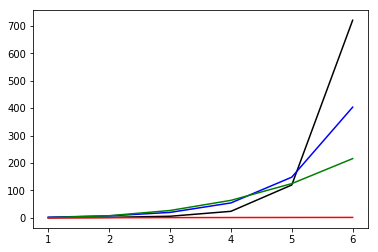

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = range(1,7)

factorial = [np.math.factorial(i) for i in x]
exponential = [np.e**i for i in x]
polynomial = [i**3 for i in x]
logarithmic = [np.log(i) for i in x]

plt.plot(x, factorial, 'black',\
         x, exponential, 'blue',\
         x, polynomial, 'green',\
         x, logarithmic, 'red')
plt.show()

根据上图，当 $x\rightarrow \infty$ 时： $x!> e^x> x^3 > ln(x)$ ，要想证明的话，可以取极限，例如： $\lim_{x\rightarrow \infty}\frac{e^x}{x^3}=\infty$ （用洛必达法则计算），表明 $x\rightarrow \infty$ 时，虽然分子分母都在趋向无限大，但是分子仍然远远凌驾于分母之上，决定了整个表达式的表现。

类似地我们也可以这样看： $\lim_{x\rightarrow \infty}\frac{ln(x)}{x^3}=0$ ，表明分母将会远远凌驾于分子之上。

In [2]:
import sympy
from sympy.abc import x
# sympy 中无限 infty 用 oo 表示
print(((sympy.E**x)/(x**3)).limit(x, sympy.oo))
# result is oo
print((sympy.ln(x)/(x**3)).limit(x, sympy.oo))

oo
0


为了描述这种随着输入 $x\rightarrow \infty$ 或 $x\rightarrow 0$ 时，函数的表现，我们如下定义大O记法：

若我们称函数 $f(x)$ 在 $x\rightarrow 0$ 时是 $O(g(x))$，则需要找到一个常数 $C$，对于足够小的 $x$ 均有 $\|f(x)\| < C\|g(x)\|$

若我们称函数 $f(x)$ 在 $x\rightarrow \infty$ 时是 $O(g(x))$，则需要找到一个常数 $C$，对于足够大的 $x$ 均有 $\|f(x)\| < C\|g(x)\|$

$f$ 和 $g$ 的关系可以理解为 $g(x)$ 是 $f(x)$ 的一个上界，也可以理解为 $f$ 最终至多增涨的速度与 $g$ 一样快，但不会超过 $g$ 的增涨速度。

更多内容，请参考[大O符号](https://zh.wikipedia.org/wiki/%E5%A4%A7O%E7%AC%A6%E5%8F%B7)

大O记法之所以得此名称，是因为函数的增长速率很多时候被称为函数的**阶（Order）**。

下面举一例：当 $x\rightarrow \infty$ 时，$x \sqrt{1+x^2}$ 是 $O(x^2)$

先来个直观感受：

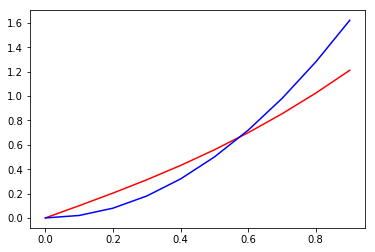

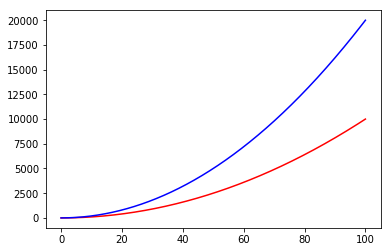

In [26]:
xvals = np.linspace(0, 100, 1000)
f = x * sympy.sqrt(1 + x**2)
g = 2 * x**2
y1 = [f.evalf(subs={x:xval}) for xval in xvals]
y2 = [g.evalf(subs={x:xval}) for xval in xvals]
plt.plot(xvals[:10], y1[:10], 'r', xvals[:10], y2[:10], 'b')
plt.show()
plt.plot(xvals, y1, 'r', xvals, y2, 'b')
plt.show()

Sympy.O() 可以帮助我们分析一个函数的阶：

In [16]:
print(sympy.O(f, (x, sympy.oo)))

O(x**2, (x, oo))


计算机学科中使用大O记法，通常是分析当输入数据 $\rightarrow \infty$ 时程序在时间或空间方面的表现。

然而，从上面的介绍，我们知道这个位置可以是 $0$，甚至可以是任何有意义的位置。

In [18]:
print(sympy.O(f, (x, 0)))

O(x)


## 误差分析

细心的读者可能曾注意到在泰勒级数一节，我们利用Sympy取函数泰勒级数的前几项时，代码是这样的：

In [20]:
exp = np.e**x
sum15 = exp.series(x, 0, 15).removeO()

其中 removeO() 的作用是让 sympy 忽略掉级数展开后的大O表示项，不然的话结果类似如下：

In [22]:
print(exp.series(x, 0, 3))
print(exp.series(x, 0, 3).removeO())

1 + 1.0*x + 0.5*x**2 + O(x**3)
0.5*x**2 + 1.0*x + 1


这表示从泰勒级数的第4项起，剩余所有项在 $x\rightarrow 0$ 时是 $O(x^3)$ 的。

这表明，当$ x\rightarrow 0$ 时，用 $1+x+0.5x^2$ 来近似 $e^x$ ，我们得到的误差的上限将是 $Cx^3$ ，其中 $C$ 是一个常数。

也就是说大O记法能用来描述我们使用多项式近似时的误差。

另外，大O记法也可以直接参与计算中去，例如我们要计算 $cos(x^2)\sqrt{(x)}$ 在 $x\rightarrow 0$ 时阶 $O(x^5)$ 以内的多项式近似，可以这样：

$cos(x^2)\sqrt{(x)}=(1-\frac{1}{2}x^4+O(x^6))x^{\frac{1}{2}}$

$\qquad = x^{\frac{1}{2}}- \frac{1}{2}x^{\frac{9}{2}} + O(x^{\frac{13}{2}})$

In [23]:
print((sympy.cos(x**2) * sympy.sqrt(x)).series(x, 0, 5))

sqrt(x) - x**(9/2)/2 + O(x**5)
